# Importing Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas_profiling
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#pip install pyod
from pyod.models.iforest import  IForest, IsolationForest
from pyod.models.lof import LOF

In [ ]:
plt.rc('font', size=15)

# Importing the Input Datasets

In [ ]:
Inpatient_Data = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/HealthCare Case Study - End to End Foundation/Medicare_Provider_Charge_Inpatient_DRG100_FY2011.csv')

In [ ]:
Outpatient_Data = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/HealthCare Case Study - End to End Foundation/Medicare_Provider_Charge_Outpatient_APC30_CY2011_v2.csv')

# Data Inspection

In [ ]:
Inpatient_Data.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07692,5777.241758,4763.736264
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85714,5787.571429,4976.714286
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37500,5434.958333,4453.791667
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28000,5417.560000,4129.160000
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27778,5658.333333,4851.444444


In [ ]:
Inpatient_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 12 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   DRG Definition                              163065 non-null  object 
 1   Provider Id                                 163065 non-null  int64  
 2   Provider Name                               163065 non-null  object 
 3   Provider Street Address                     163065 non-null  object 
 4   Provider City                               163065 non-null  object 
 5   Provider State                              163065 non-null  object 
 6   Provider Zip Code                           163065 non-null  int64  
 7   Hospital Referral Region (HRR) Description  163065 non-null  object 
 8   Total Discharges                            163065 non-null  int64  
 9   Average Covered Charges                     163065 non-null  float64
 

In [ ]:
Inpatient_Data.shape

(163065, 12)

In [ ]:
Inpatient_Data.describe().T

,count,mean,std,min,25%,50%,75%,max
Provider Id,163065.0,255569.865428,151563.671767,10001.000000,110092.000000,250007.000000,380075.00000,670077.0000
Provider Zip Code,163065.0,47938.121908,27854.323080,1040.000000,27261.000000,44309.000000,72901.00000,99835.0000
Total Discharges,163065.0,42.776304,51.104042,11.000000,17.000000,27.000000,49.00000,3383.0000
Average Covered Charges,163065.0,36133.958434,35065.365905,2459.400000,15947.166670,25245.823530,43232.59259,929118.9091
Average Total Payments,163065.0,9707.477867,7664.642652,2673.000000,5234.500000,7214.100000,11286.40000,156158.1818
Average Medicare Payments,163065.0,8494.495174,7309.467247,1148.909091,4192.354839,6158.465116,10056.88235,154620.8182


In [ ]:
Outpatient_Data.head()

,APC,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Outpatient Services,Average Estimated Submitted Charges,Average Total Payments
0,0012 - Level I Debridement & Destruction,10029,EAST ALABAMA MEDICAL CENTER AND SNF,2000 PEPPERELL PARKWAY,OPELIKA,AL,36801,AL - Birmingham,23,78.086957,21.910435
1,0012 - Level I Debridement & Destruction,20024,CENTRAL PENINSULA GENERAL HOSPITAL,250 HOSPITAL PLACE,SOLDOTNA,AK,99669,AK - Anchorage,994,149.589749,36.623853
2,0012 - Level I Debridement & Destruction,30064,"UNIVERSITY OF ARIZONA MEDICAL CTR-UNIVERSIT, THE",1501 NORTH CAMPBELL AVENUE,TUCSON,AZ,85724,AZ - Tucson,1765,50.135411,14.541841
3,0012 - Level I Debridement & Destruction,30088,BANNER BAYWOOD MEDICAL CENTER,6644 EAST BAYWOOD AVENUE,MESA,AZ,85206,AZ - Mesa,20,112.400000,23.736000
4,0012 - Level I Debridement & Destruction,30111,"UNIVERSITY OF ARIZONA MEDICAL CTR- SOUTH CAM, THE",2800 EAST AJO WAY,TUCSON,AZ,85713,AZ - Tucson,22,152.045455,16.569091


In [ ]:
Outpatient_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43372 entries, 0 to 43371
Data columns (total 11 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   APC                                         43372 non-null  object 
 1   Provider Id                                 43372 non-null  int64  
 2   Provider Name                               43372 non-null  object 
 3   Provider Street Address                     43372 non-null  object 
 4   Provider City                               43372 non-null  object 
 5   Provider State                              43372 non-null  object 
 6   Provider Zip Code                           43372 non-null  int64  
 7   Hospital Referral Region (HRR) Description  43372 non-null  object 
 8   Outpatient Services                         43372 non-null  int64  
 9   Average  Estimated Submitted Charges        43372 non-null  float64
 10  Average To

In [ ]:
Outpatient_Data.shape

(43372, 11)

In [ ]:
Outpatient_Data.describe().T

,count,mean,std,min,25%,50%,75%,max
Provider Id,43372.0,265410.921747,152729.927698,10001.00000,140043.000000,260091.000000,390101.000000,670061.000000
Provider Zip Code,43372.0,49041.022434,27497.899751,1040.00000,28645.000000,46342.000000,73101.000000,99801.000000
Outpatient Services,43372.0,587.980955,3280.397168,11.00000,42.000000,128.000000,347.000000,219042.000000
Average Estimated Submitted Charges,43372.0,1473.994047,1837.530791,12.64375,284.610498,709.995188,2102.121346,32105.636360
Average Total Payments,43372.0,265.425586,261.260146,7.30500,74.627714,139.298570,394.211316,2062.470526


## Duplicated Value Inspection

In [ ]:
Inpatient_Data.duplicated().sum()

0

In [ ]:
Outpatient_Data.duplicated().sum()

0

No Duplicate Value has been found in either of the Datasets

## Missing Value Inspection

In [ ]:
Inpatient_Data.isna().sum()

DRG Definition                                0
Provider Id                                   0
Provider Name                                 0
Provider Street Address                       0
Provider City                                 0
Provider State                                0
Provider Zip Code                             0
Hospital Referral Region (HRR) Description    0
Total Discharges                              0
Average Covered Charges                       0
Average Total Payments                        0
Average Medicare Payments                     0
dtype: int64

In [ ]:
Outpatient_Data.isna().sum()

APC                                           0
Provider Id                                   0
Provider Name                                 0
Provider Street Address                       0
Provider City                                 0
Provider State                                0
Provider Zip Code                             0
Hospital Referral Region (HRR) Description    0
Outpatient Services                           0
Average  Estimated Submitted Charges          0
Average Total Payments                        0
dtype: int64

Same for Missing values, There are None.

## Profile Report using Pandas Profiling

In [ ]:
#pip install pandas_profiling --upgrade

In [ ]:
ProfileReport_Inpatient = pandas_profiling.ProfileReport(Inpatient_Data, config_file='/content/drive/MyDrive/Colab Notebooks/config_medium.yaml')
ProfileReport_Inpatient
#ProfileReport_Inpatient.to_file('ProfileReport_Inpatient.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
ProfileReport_Outpatient = pandas_profiling.ProfileReport(Outpatient_Data, config_file='/content/drive/MyDrive/Colab Notebooks/config_medium.yaml')
ProfileReport_Outpatient
#ProfileReport_Outpatient.to_file('ProfileReport_Outpatient.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Data Preparation

## Subsetting

#### Now based on EDA with the help of Profile Generated from Pandas Profiling, The Columns we keeping are:
1. 'DRG Definition' in Inpatient_Data and 'APC' in Outpatient_Data as they both are the Procedures themselves.
2. We have to keep Either one from 'Provider Name' or 'Provider Id', as We have to segment similar providers into clusters and find out the dissimilar one.
It's more of a Subjective call so i will go with Provider Name as they give more info about the Providers rather than the ids.
3. Similarly, We are gonna keep 'Hospital Referral Region (HRR) Description' which is Region as we have to perform clustering for regions also.
4. 'Provider State' as it has comparably much less cardinality than the other nominal variables.
5. And all the other int or float type variables.
Note: We will be removing all others insignificant nominal variables with high cardinality.

In [ ]:
Outpatient_Data.columns

Index(['APC', 'Provider Id', 'Provider Name', 'Provider Street Address',
       'Provider City', 'Provider State', 'Provider Zip Code',
       'Hospital Referral Region (HRR) Description', 'Outpatient Services',
       'Average  Estimated Submitted Charges', 'Average Total Payments'],
      dtype='object')

In [ ]:
Inpatient1 = Inpatient_Data[['DRG Definition', 'Provider Name', 'Provider State',
                            'Hospital Referral Region (HRR) Description',
                            'Total Discharges', 'Average Covered Charges', 'Average Total Payments']]

In [ ]:
Outpatient1 = Outpatient_Data[['APC', 'Provider Name', 
                              'Provider State', 'Hospital Referral Region (HRR) Description', 'Outpatient Services', 
                              'Average  Estimated Submitted Charges', 'Average Total Payments']]

## Renaming

#### We have to rename some variables so that both Inpatient and Outpatient Data contains variables of similar names and thus, can be vertically concatenated easily.

In [ ]:
Inpatient1.rename(columns={'DRG Definition':'Procedure', 'Provider Name':'Provider', 'Provider State':'State', 'Hospital Referral Region (HRR) Description':'Region',
                            'Total Discharges':'Services_Count','Average Covered Charges':'Claim_Cost', 'Average Total Payments':'Reimbursements'}, inplace=True)

In [ ]:
Outpatient1.rename(columns={'APC':'Proceudre', 'Provider Name':'Provider', 'Provider State':'State', 'Hospital Referral Region (HRR) Description':'Region', 'Outpatient Services':'Services_Count', 
                              'Average  Estimated Submitted Charges':'Claim_Cost', 'Average Total Payments':'Reimbursements'}, inplace=True)

In [ ]:
Merged_Data = pd.concat([Inpatient1,Outpatient1], ignore_index=True)

In [ ]:
Merged_Data.head()

,Procedure,Provider,State,Region,Services_Count,Claim_Cost,Reimbursements,Proceudre
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,SOUTHEAST ALABAMA MEDICAL CENTER,AL,AL - Dothan,91,32963.07692,5777.241758,NaN
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,MARSHALL MEDICAL CENTER SOUTH,AL,AL - Birmingham,14,15131.85714,5787.571429,NaN
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ELIZA COFFEE MEMORIAL HOSPITAL,AL,AL - Birmingham,24,37560.37500,5434.958333,NaN
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ST VINCENT'S EAST,AL,AL - Birmingham,25,13998.28000,5417.560000,NaN
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,SHELBY BAPTIST MEDICAL CENTER,AL,AL - Birmingham,18,31633.27778,5658.333333,NaN


In [ ]:
Merged_Data.shape

(206437, 8)

## Grouping

Note : We will be using 'nunique' as our aggregate function to group the nominal variables (Procedure, State, Region and Provider) which provides the number of unique categories in each groups instead of creating summy variables as the Nominal Variables in our Data have very highy Cardibality.

### By Provider

In [ ]:
Data_Provider = Merged_Data.groupby('Provider').agg({
    'Procedure':'nunique',
    'State':'nunique',
    'Region':'nunique',
    'Services_Count':'sum',
    'Claim_Cost':'sum',
    'Reimbursements':'sum'
}).reset_index()
Data_Provider.head()

,Provider,Procedure,State,Region,Services_Count,Claim_Cost,Reimbursements
0,ABBEVILLE GENERAL HOSPITAL,18,1,1,1294,3.140589e+05,1.211158e+05
1,ABBOTT NORTHWESTERN HOSPITAL,97,1,1,20810,4.495572e+06,1.065439e+06
2,ABILENE REGIONAL MEDICAL CENTER,58,1,1,7285,3.613719e+06,5.165803e+05
3,ABINGTON MEMORIAL HOSPITAL,99,1,1,19300,6.832266e+06,1.027582e+06
4,ACMH HOSPITAL,33,1,1,4151,4.067190e+05,1.993325e+05


In [ ]:
Data_Provider.shape

(3201, 7)

### By Region

In [ ]:
Data_Region = Merged_Data.groupby('Region').agg({
    'Procedure':'nunique',
    'Provider':'nunique',
    'State':'nunique',
    'Services_Count':'sum',
    'Claim_Cost':'sum',
    'Reimbursements':'sum'
}).reset_index()
Data_Region.head()

,Region,Procedure,Provider,State,Services_Count,Claim_Cost,Reimbursements
0,AK - Anchorage,78,9,1,31406,9.427446e+06,3.390446e+06
1,AL - Birmingham,100,40,2,166237,6.836406e+07,1.464821e+07
2,AL - Dothan,97,10,3,43700,9.561883e+06,2.419670e+06
3,AL - Huntsville,100,8,2,71691,1.175407e+07,3.090570e+06
4,AL - Mobile,100,14,2,70394,1.619382e+07,4.256182e+06


In [ ]:
Data_Region.shape

(306, 7)

# Data Pre-Processing

## Standardization

### For Provier Data

In [ ]:
sc1 = StandardScaler()

In [ ]:
Provider_Scaled = pd.DataFrame(sc1.fit_transform(Data_Provider[Data_Provider.columns.difference(['Provider'])]), columns=Data_Provider.columns.difference(['Provider']))
Provider_Scaled.head()

,Claim_Cost,Procedure,Region,Reimbursements,Services_Count,State
0,-0.793035,-0.987022,-0.124073,-0.872222,-0.424056,-0.131167
1,1.351016,1.515080,-0.124073,1.312563,0.510864,-0.131167
2,0.898850,0.279865,-0.124073,0.042724,-0.137055,-0.131167
3,2.549144,1.578424,-0.124073,1.224978,0.438527,-0.131167
4,-0.745524,-0.511940,-0.124073,-0.691260,-0.287190,-0.131167


### For Region Data

In [ ]:
sc2 = StandardScaler()

In [ ]:
Region_Scaled = pd.DataFrame(sc2.fit_transform(Data_Region[Data_Region.columns.difference(['Region'])]), columns=Data_Region.columns.difference(['Region']))
Region_Scaled.head()

,Claim_Cost,Procedure,Provider,Reimbursements,Services_Count,State
0,-0.402994,-1.929942,-0.177865,-0.321317,-0.548701,-0.579479
1,1.963364,0.621083,2.726140,1.665985,0.441306,1.193727
2,-0.397596,0.273216,-0.084187,-0.492686,-0.458432,2.966932
3,-0.309577,0.621083,-0.271542,-0.374254,-0.252906,1.193727
4,-0.131318,0.621083,0.290523,-0.168491,-0.262429,1.193727


In [ ]:
Region_Scaled.shape

(306, 6)

# Dimension Redcution using PCA ( Principle Component Analysis )

### For Provider Data

In [ ]:
pc1 = PCA(n_components=6)

In [ ]:
pc1.fit(Provider_Scaled)

PCA(n_components=6)

In [ ]:
sum(pc1.explained_variance_)

6.001875

In [ ]:
pd.DataFrame({'Eigen_value': pc1.explained_variance_, 'Cumm_variance':np.cumsum(np.round(pc1.explained_variance_ratio_, 4)*100)}, index=range(1,7))

,Eigen_value,Cumm_variance
1,3.377945,56.28
2,1.570796,82.45
3,0.739168,94.77
4,0.221105,98.45
5,0.075576,99.71
6,0.017284,100.00


Here, components = 3 seems like a good option because it will have around 94% of the variance explained.

In [ ]:
pc1_final = PCA(n_components=3)

In [ ]:
Provider_PCA = pd.DataFrame(pc1_final.fit_transform(Provider_Scaled), columns=['C1', 'C2', 'C3'])
Provider_PCA.head()

,C1,C2,C3
0,-1.448901,0.662250,0.174831
1,2.000936,-1.380822,-0.475542
2,0.430653,-0.396248,-0.494050
3,2.522872,-1.586312,-0.924443
4,-1.093163,0.392422,0.153756


### For Region Data

In [ ]:
pc2 = PCA(n_components=6)

In [ ]:
pc2.fit(Region_Scaled)

PCA(n_components=6)

In [ ]:
sum(pc2.explained_variance_)

6.0196721311475425

In [ ]:
pd.DataFrame({'Eigen_value': pc2.explained_variance_, 'Cumm_variance':np.cumsum(np.round(pc2.explained_variance_ratio_, 4)*100)}, index=range(1,7))

,Eigen_value,Cumm_variance
1,3.559246,59.13
2,1.024984,76.16
3,0.778223,89.09
4,0.455731,96.66
5,0.143437,99.04
6,0.058052,100.00


For components =2, The variance explained is 76% with eigen value at 1, which is perfect.

In [ ]:
pc2_final = PCA(n_components=2)

In [ ]:
Region_PCA = pd.DataFrame(pc2_final.fit_transform(Region_Scaled), columns=['C1', 'C2'])
Region_PCA.head()

,C1,C2
0,-1.261091,-1.004596
1,3.627632,0.702902
2,-0.265392,2.971857
3,-0.278139,1.423117
4,0.185897,1.371308


# Data Modelling

#### We are going to be using PyOD (Python Outlier Detection) Library which consists of number of different model algorithm modules to find outliers/anomaly in the data.

### For Provider Data

#### We are going to be using LOF ( Local Outlier Factor ) to find the providers which are least similar to other providers.

In [ ]:
LOF_model1 = LOF(metric='euclidean', contamination=0.001)
LOF_model1.fit(Provider_PCA)

LOF(algorithm='auto', contamination=0.001, leaf_size=30, metric='euclidean',
  metric_params=None, n_jobs=1, n_neighbors=20, novelty=True, p=2)

In [ ]:
Data_Provider['Anomaly'] = LOF_model1.predict(Provider_PCA)

In [ ]:
Data_Provider['Anomaly'].value_counts()

0    3198
1       3
Name: Anomaly, dtype: int64

In [ ]:
Data_Provider[Data_Provider.Anomaly==1]

,Provider,Procedure,State,Region,Services_Count,Claim_Cost,Reimbursements,Anomaly
489,CLEVELAND CLINIC,95,1,1,377234,4.653234e+06,1.198120e+06,1
924,GOOD SAMARITAN HOSPITAL,100,6,9,69164,2.817544e+07,6.991829e+06,1
2397,SCOTT & WHITE MEMORIAL HOSPITAL,93,1,1,402799,2.823332e+06,1.061029e+06,1


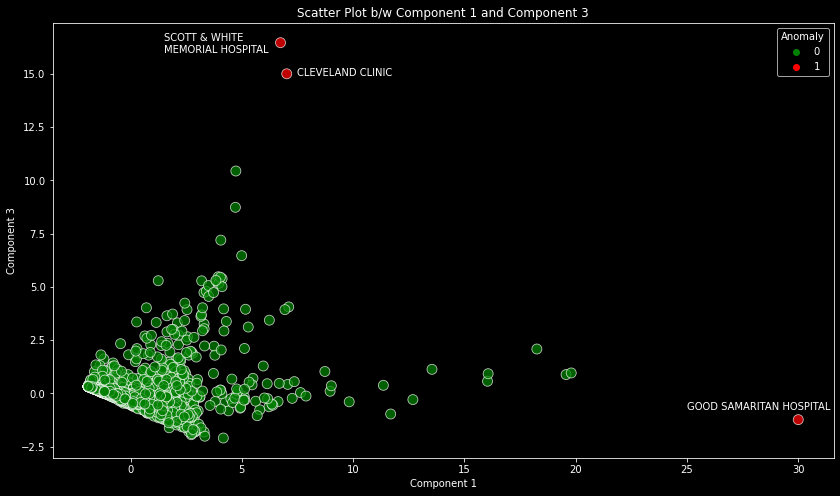

In [ ]:
with plt.style.context('dark_background'):
  plt.figure(figsize=(14,8))
  sns.scatterplot(Provider_PCA.C1, Provider_PCA.C3, hue=Data_Provider.Anomaly, alpha=0.75, palette=['g', 'r'], s=100)
  plt.xlabel('Component 1')
  plt.ylabel('Component 3')
  plt.annotate('CLEVELAND CLINIC', xy =(7, 15), xytext =(7.5, 14.9))
  plt.annotate('GOOD SAMARITAN HOSPITAL', xy =(30, -1.2), xytext =(25, -0.75)) 
  plt.annotate('SCOTT & WHITE\nMEMORIAL HOSPITAL', xy =(6.7, 16.5), xytext =(1.5, 16))
  plt.title('Scatter Plot b/w Component 1 and Component 3')
  plt.show()

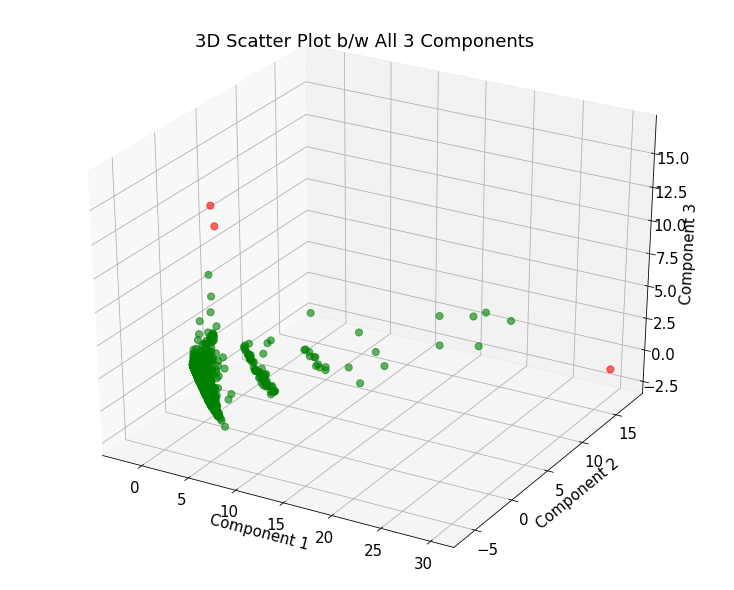

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

fig = plt.figure(figsize=(10,8))
ax = Axes3D(fig)
fig.add_axes(ax)

categories = np.array(Data_Provider.Anomaly)
colormap = np.array(['g', 'r'])

sc = ax.scatter(xs=Provider_PCA.C1, ys=Provider_PCA.C2, zs=Provider_PCA.C3, s=50, c=colormap[categories], marker='o', alpha=0.6)
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')

plt.title('3D Scatter Plot b/w All 3 Components ')
plt.show()

### For Region Data

#### Isolaton Forest will be used to find the Regions which are least similar to the other Regions.

In [ ]:
IF_model = IForest(contamination=0.01, random_state=12345)
IF_model.fit(Region_PCA)

IForest(behaviour='old', bootstrap=False, contamination=0.01,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=1,
    random_state=12345, verbose=0)

In [ ]:
Data_Region['Anomaly'] = IF_model.predict(Region_PCA)

In [ ]:
Data_Region[Data_Region.Anomaly==1]

,Region,Procedure,Provider,State,Services_Count,Claim_Cost,Reimbursements,Anomaly
21,CA - Los Angeles,100,80,1,505020,2.510713e+08,4.711595e+07,1
127,MA - Boston,100,41,1,1494212,6.187040e+07,3.078173e+07,1
278,UT - Salt Lake City,96,25,4,204235,1.540584e+07,6.209710e+06,1
300,WI - Neenah,42,3,1,11215,1.432813e+06,6.466069e+05,1


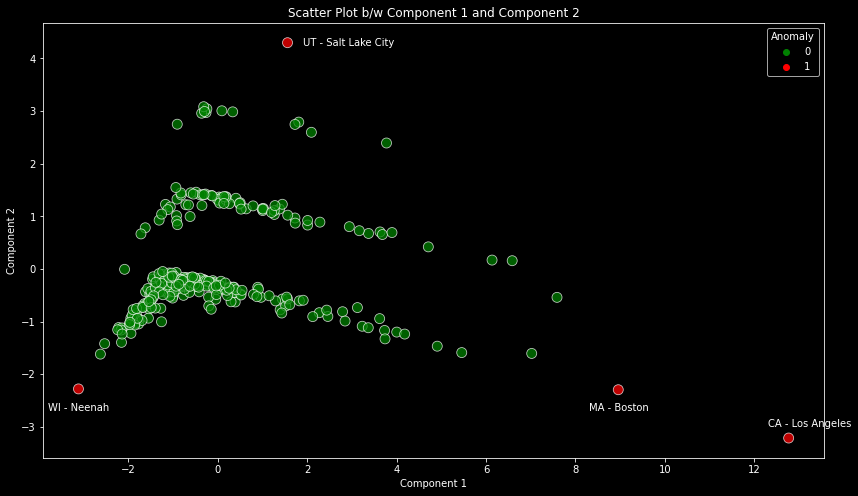

In [ ]:
with plt.style.context('dark_background'):
  plt.figure(figsize=(14,8))
  sns.scatterplot(Region_PCA.C1, Region_PCA.C2, hue=Data_Region.Anomaly, alpha=0.75, palette=['g', 'r'], s=100)
  plt.xlabel('Component 1')
  plt.ylabel('Component 2')
  plt.annotate('WI - Neenah', xy =(-3.2, -2.4), xytext =(-3.8, -2.7))
  plt.annotate('UT - Salt Lake City', xy =(1.5, 4.2), xytext =(1.9, 4.25)) 
  plt.annotate('MA - Boston', xy =(9, -2.3), xytext =(8.3, -2.7))
  plt.annotate('CA - Los Angeles', xy =(12.8, -3.2), xytext =(12.3, -3))
  plt.title('Scatter Plot b/w Component 1 and Component 2')
  plt.show()